# Clustering Analysis


## A. Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.
Dataset Link: https://www.kaggle.com/datasets/uciml/iris

### Step 1: Load Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Step 2: Load the Dataset

In [ ]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Observation**:

We expect the Iris dataset to have five columns: SepalLength, SepalWidth, PetalLength, PetalWidth, and Species. The Species column contains labels that we won't use for clustering, as K-Means is an unsupervised algorithm.

### Step 3: Data Preprocessing

In [ ]:
# Drop 'Id' and 'Species' columns for clustering
iris_data_cleaned = iris_data.drop(columns=['Id', 'Species'])

# Check for any missing values in the data
iris_data_cleaned.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
# Outlier detection using Interquartile Range (IQR)
Q1 = iris_data_cleaned.quantile(0.25)
Q3 = iris_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).sum()

# Print outliers count per feature
outliers

,0
SepalLengthCm,0
SepalWidthCm,4
PetalLengthCm,0
PetalWidthCm,0
Cluster_3,0
Cluster_4,0


**Observation:**

It seems that there are 4 data points that are outliers for the `SepalWidthCm` column and needs handling

In [ ]:
# Remove outliers from the dataset
iris_data_no_outliers = iris_data_cleaned[~((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).any(axis=1)]

# Check the shape to confirm the removal
iris_data_no_outliers.shape

(146, 6)

**Observation:**

At this point, we expect no missing values, as the Iris dataset is usually clean. We will also confirm that we only have numerical features remaining.




### Step 4: Data Standardization

In [ ]:
# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data_no_outliers)

# Checking the first few rows of the scaled data
pd.DataFrame(iris_scaled, columns=iris_data_no_outliers.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_3,Cluster_4
0,-0.910515,1.175789,-1.374878,-1.345899,0.041625,0.780941
1,-1.151122,-0.093924,-1.374878,-1.345899,0.041625,1.700435
2,-1.391729,0.413961,-1.431986,-1.345899,0.041625,1.700435
3,-1.512032,0.160019,-1.317771,-1.345899,0.041625,1.700435
4,-1.030819,1.429732,-1.374878,-1.345899,0.041625,0.780941


**Observation:**

We now expect the data to be scaled, meaning each feature will have a mean of 0 and a standard deviation of 1.

### Step 5: Elbow Method for Determining Optimal Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

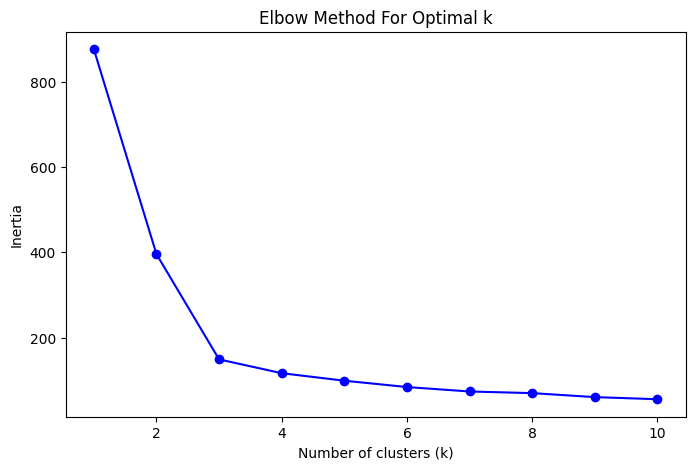

In [ ]:
# Apply KMeans clustering for a range of cluster numbers
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

**Observation:**

We expect to see a graph where the inertia decreases sharply as we increase the number of clusters but starts leveling off at some point. This "elbow point" is the optimal number of clusters.

### Step 6: K-Means Clustering with k=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-18-234b1b08c2dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_no_outliers['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)


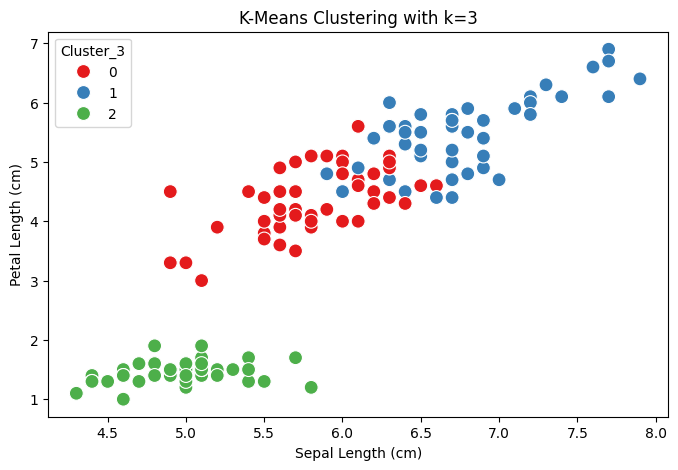

In [ ]:
# Apply K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
iris_data_no_outliers['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)

# Visualizing the clusters using Sepal and Petal length/width
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_data_no_outliers['SepalLengthCm'],
                y=iris_data_no_outliers['PetalLengthCm'],
                hue=iris_data_no_outliers['Cluster_3'],
                palette='Set1',
                s=100)

plt.title('K-Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()


**Observation:**

k=3 clusters provide a good balance between simplicity and clear separation of the natural groups in the data.

## B. Implement K-Mediod Algorithm on a credit card dataset. Determine the number of clusters using the Silhouette Method.
Dataset link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s eta 0:00:00


### Step 1: Load Required Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset

In [ ]:
# Load the Credit Card dataset
cc_data = pd.read_csv('CC_GENERAL.csv')

# Check the first few rows of the dataset
cc_data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Observation:**

At this point, we should observe the features of the credit card dataset. Typically, it contains variables like Balance, Purchase Frequency, Credit Limit, etc., related to customer spending and financial behavior.

### Step 3: Data Preprocessing

In [ ]:
# Drop 'CUST_ID' or other non-essential columns if present
cc_data_cleaned = cc_data.drop(columns=['CUST_ID'], errors='ignore')

In [ ]:
# Checking for missing values
cc_data_cleaned.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
# Fill missing values or remove columns with too many missing entries
cc_data_cleaned = cc_data_cleaned.fillna(cc_data_cleaned.mean())  # Filling missing values with the mean

In [ ]:
# Outlier detection using Interquartile Range (IQR) for credit card dataset
Q1 = cc_data_cleaned.quantile(0.25)
Q3 = cc_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).sum()

# Print outliers count per feature
outliers


,0
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


**Observation:**

Here, we'll see how many outliers each feature contains. Since K-Medoids can handle outliers better, remove extreme outliers based on the results.

In [ ]:
# Remove extreme outliers from the dataset
cc_data_no_outliers = cc_data_cleaned[~((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).any(axis=1)]

# Check the shape of the dataset after removing outliers
cc_data_no_outliers.shape

(3008, 17)

In [ ]:
# Standardize the data
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc_data_no_outliers)

# Display the first few rows of scaled data
pd.DataFrame(cc_scaled, columns=cc_data_no_outliers.columns).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.131269,-2.612474,-0.633293,-0.600975,-0.317876,-0.642297,-0.605515,-0.665943,-0.583045,-0.795348,-0.733143,-0.639532,-0.905896,-0.883689,-0.939719,-0.413311,0.0
1,-0.380238,0.338454,-0.812054,-0.552896,-0.689772,-0.642297,-0.829192,-0.184301,-0.805551,-0.795348,-0.733143,-0.752725,-0.823243,-0.199214,-0.651006,-0.413311,0.0
2,0.592313,0.338454,0.133981,-0.600975,1.010658,-0.642297,1.631241,-0.665943,1.864528,-0.795348,-0.733143,0.492397,-0.368648,-0.198165,0.136700,-0.413311,0.0
3,-0.189572,0.338454,1.091476,1.386746,0.089884,-0.642297,-0.158165,-0.184301,-0.138031,-0.795348,-0.733143,-0.299954,1.573711,-0.184931,-0.466799,-0.413311,0.0
4,1.509931,0.338454,-0.848076,-0.600975,-0.689772,-0.108575,-1.052867,-0.665943,-0.805551,-0.141509,-0.320630,-0.865918,-0.079361,-0.016345,1.392478,-0.413311,0.0


### Step 4: K-Medoid Clustering with Silhouette Method for Optimal Number of Clusters

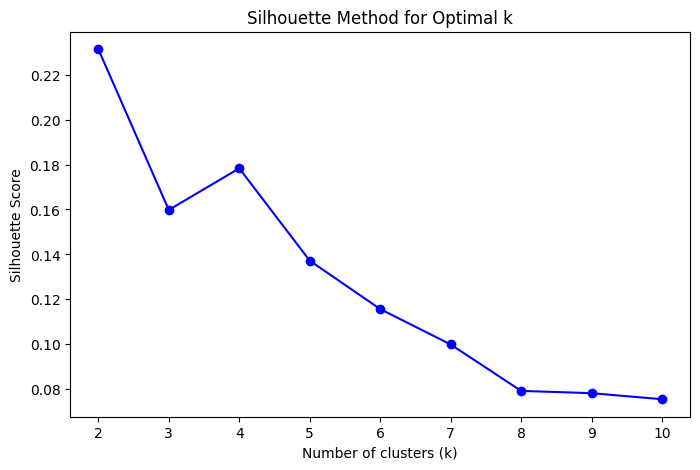

In [ ]:
# Finding the optimal number of clusters using the Silhouette score
silhouette_scores = []
K = range(2, 11)  # Start from 2 clusters since silhouette is undefined for 1 cluster

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    cluster_labels = kmedoids.fit_predict(cc_scaled)

    # Calculate the silhouette score
    score = silhouette_score(cc_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores for different number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


**Observation:**

k = 2 provides the highest silhouette score so we select k = 2

### Step 5: Finalizing the K-Medoids Clustering with k=2

<ipython-input-11-085aa66ee8fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)


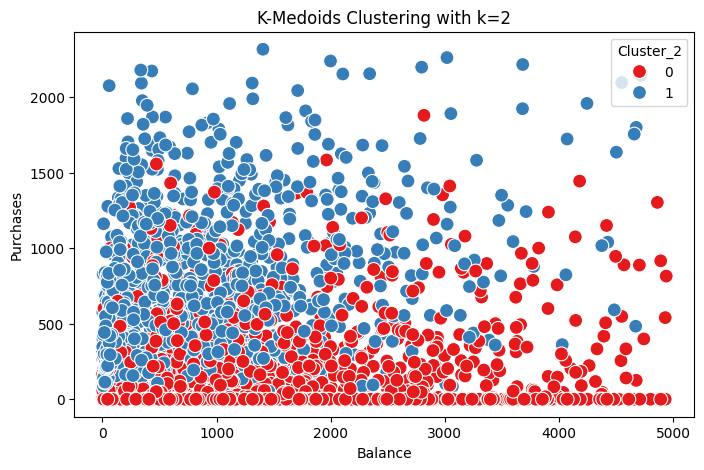

In [ ]:
# Apply K-Medoids clustering with k=2
kmedoids_2 = KMedoids(n_clusters=2, random_state=42)
cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)

# Visualizing the clusters (if you want to visualize two features, you can change x and y)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cc_data_no_outliers['BALANCE'],
                y=cc_data_no_outliers['PURCHASES'],
                hue=cc_data_no_outliers['Cluster_2'],
                palette='Set1',
                s=100)

plt.title('K-Medoids Clustering with k=2')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()
